In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from  graphviz import Source
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'

HTML(style)


sns.set(rc={'figure.figsize':(15,6)})

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,roc_curve, auc


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [3]:
titanic_data=pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket','Cabin'], axis=1, inplace=False)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
X=pd.get_dummies(X)

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
X=X.fillna({'Age': X.Age.median()})
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [11]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
clf

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.score(X,y)

0.9797979797979798

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
clf.score(X_train,y_train)

0.9714765100671141

In [17]:
clf.score(X_test,y_test)

0.9966101694915255

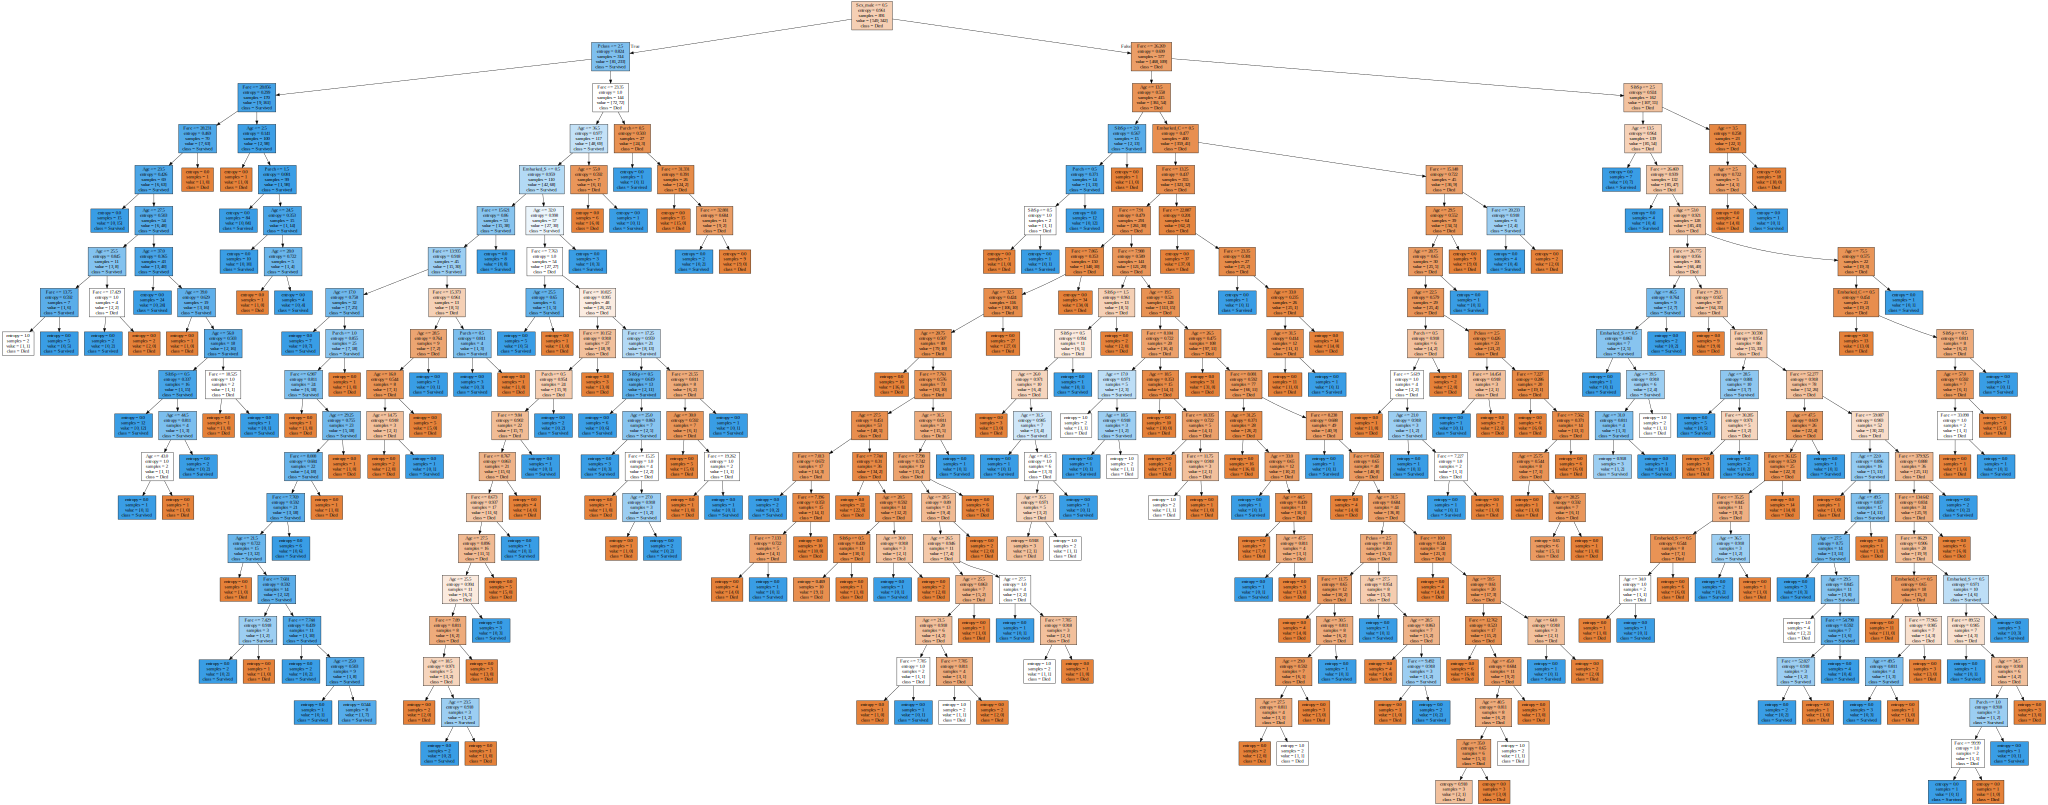

In [18]:
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

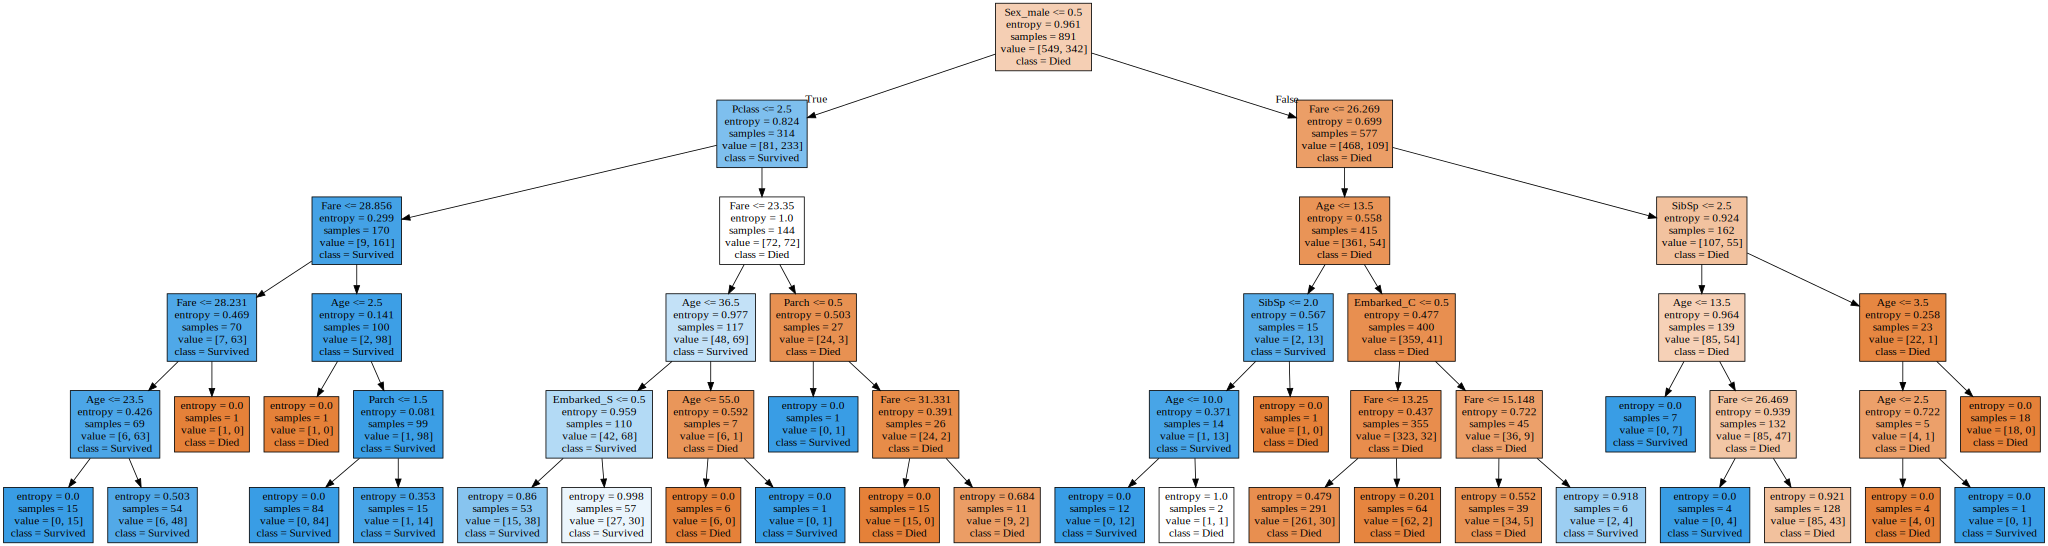

Wall time: 167 ms


In [19]:
%%time
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

In [20]:
print(X_train.shape, X_test.shape)

(596, 10) (295, 10)


In [21]:
clf1=tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
clf1.score(X_train,y_train)

0.9798657718120806

In [24]:
clf1.score(X_test,y_test)

0.7694915254237288

In [25]:
clf2=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2.fit(X_train, y_train)
print(clf2.score(X_train,y_train), clf2.score(X_test,y_test))


0.8238255033557047 0.8203389830508474


### Cross validation

https://scikit-learn.org/stable/modules/cross_validation.html

mean cross_val_score наиболее устойчив к переобучению

In [26]:
max_depth_values = range(1, 100)
type(max_depth_values)

range

In [27]:
#https://stepik.org/lesson/209691/step/2?unit=183195

In [28]:
scores_data=pd.DataFrame()
for max_depth in max_depth_values:
    clf5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf5.fit(X_train, y_train)
    train_score = clf5.score(X_train, y_train)
    test_score = clf5.score(X_test, y_test)
    mean_cross_val_score=cross_val_score(clf5, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                   'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score':[mean_cross_val_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

In [29]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392
...,...,...,...,...
0,95,0.979866,0.772881,0.765154
0,96,0.979866,0.769492,0.766835
0,97,0.979866,0.776271,0.775224
0,98,0.979866,0.766102,0.763459


In [30]:
# melt - это способ перегруппировки данных. Для каждого варианта max_depth показываются и трейн и тест скор (см хед и тейл)

In [31]:
 scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', "test_score", "cross_val_score"], 
                            var_name='set_type', value_name='score')
    
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [32]:
scores_data_long.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.765154
293,96,cross_val_score,0.766835
294,97,cross_val_score,0.775224
295,98,cross_val_score,0.763459
296,99,cross_val_score,0.765154


<AxesSubplot:xlabel='max_depth', ylabel='score'>

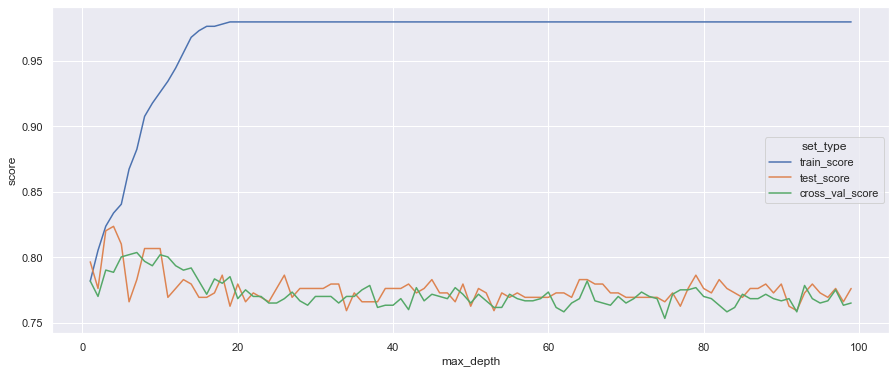

In [33]:
sns.lineplot(x= 'max_depth', y = 'score', hue='set_type', data=scores_data_long )

<AxesSubplot:xlabel='max_depth', ylabel='train_score'>

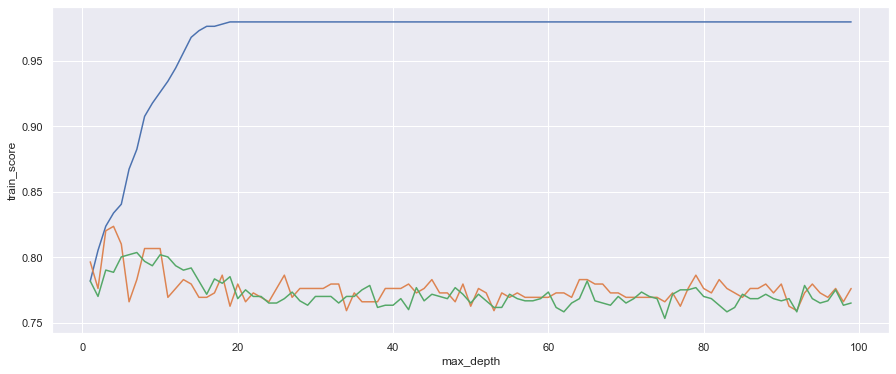

In [34]:
sns.lineplot(x= 'max_depth', y = 'train_score', data=scores_data)
sns.lineplot(x= 'max_depth', y = 'test_score', data=scores_data)
sns.lineplot(x= 'max_depth', y = 'cross_val_score', data=scores_data)

Так выглядит возможный пример дерева с параметром максимальной глубины равным 3. Легко можно заметить, что особенно важными переменными для анализа является пол и возраст. Кстати, про то, как при помощи дерева решений вычленить фичи, максимально важные для решения конкретной задачи классификации, мы подробнее поговорим в 3 модуле курса.

Тут же обратите внимание на еще один важный момент, если бы к нам поступил новый пассажир, и мы бы захотели, предсказать для него не только значение класса но и вероятность, того что он выживет на Титанике, это было бы несложно сделать при помощи нашего дерева. Обратите внимание, цвет финальных прямоугольничков различается, соотношение выживших/погибших пассажиров различается в финальных исходах - прямоугольничках. 

Например, если бы к нам пришло новое наблюдение Sex_male <=0.05, Pclass <= 2.5, Age > 2.5,  то предсказанная вероятность выжить была бы равна 102 / (102 + 3), то есть 97%. 

Но давайте сразу поймем, что с нашим деревом не так? Обратите внимание, что данное дерево все равно выглядит переобученным, например, есть разделение, которое приводит к тому, что под условие Age <= 2.5 проходит всего два наблюдения с разными классами, запомним эту проблему деревьев и вернемся к ней позже.



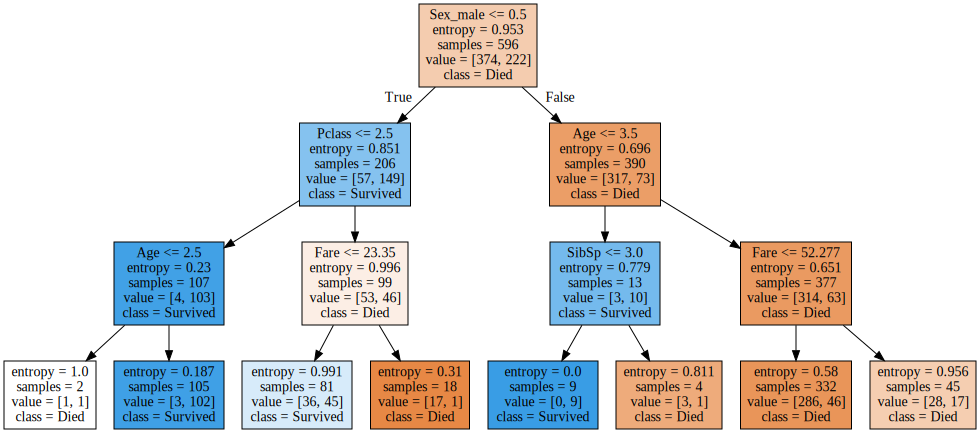

In [35]:
graph = Source(tree.export_graphviz(clf2
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

In [36]:
clf4=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf4.fit(X_train, y_train)
print(clf4.score(X_train,y_train), clf4.score(X_test,y_test))


0.8338926174496645 0.823728813559322


In [37]:
cross_val_score(clf4, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [38]:
cross_val_score(clf4, X_train, y_train, cv=5).mean()

0.7886274509803922

In [39]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.803739
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.802031


На основании данной таблицы мы узнали, что наилучший параметр достигается при max_depth=10. Его и передадим в лучший классификатор best_clf

In [40]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
print(best_clf.score(X_train,y_train), best_clf.score(X_test,y_test))


0.9261744966442953 0.8067796610169492


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7898305084745763

In [43]:
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)
           #, 'min_samples_leaf': [2]
          }

In [44]:
clf=tree.DecisionTreeClassifier()

In [45]:
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5
                                #, n_jobs=-1
                               )

In [46]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [48]:
best_clf=grid_search_cv_clf.best_estimator_

In [49]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [50]:
best_clf.score(X_test, y_test)

0.7728813559322034

In [51]:
y_pred= best_clf.predict(X_test)

In [52]:
precision_score(y_test, y_pred)

0.7476635514018691

In [53]:
recall_score(y_test, y_pred)

0.6666666666666666

In [54]:
y_pred_proba=best_clf.predict_proba(X_test)
y_pred_proba

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [55]:
y_pred_proba[:,1]

array([0.57142857, 0.5       , 0.13793103, 1.        , 1.        ,
       0.        , 0.85714286, 0.13793103, 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.08333333, 0.27272727,
       1.        , 0.        , 0.28571429, 0.03488372, 0.        ,
       0.03488372, 0.5       , 0.28571429, 0.13793103, 0.03488372,
       0.        , 0.5       , 0.5       , 0.        , 1.        ,
       0.13793103, 1.        , 0.22222222, 1.        , 0.13793103,
       0.57142857, 0.22222222, 0.85714286, 1.        , 0.03488372,
       0.        , 1.        , 0.03488372, 0.1627907 , 0.        ,
       0.13793103, 0.13793103, 0.03488372, 0.1627907 , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.5       , 0.        , 1.        , 0.28571429,
       0.1627907 , 1.        , 1.        , 0.        , 0.1627907 ,
       1.        , 0.        , 0.03488372, 0.33333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.03488

<AxesSubplot:>

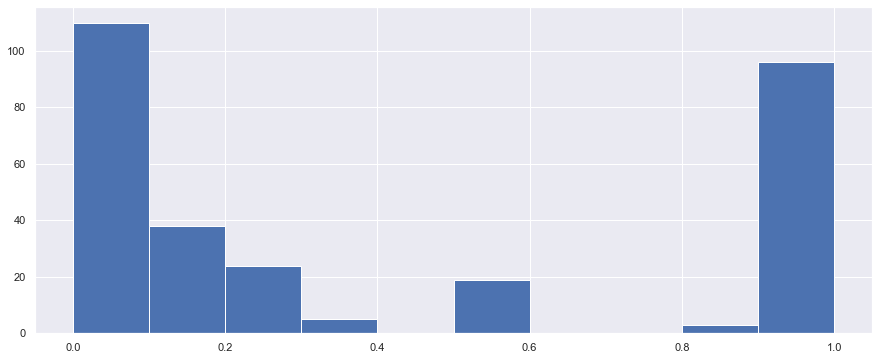

In [56]:
pd.Series(y_pred_proba[:,1]).hist()

In [57]:
#Вот тут переопределён у_пред, чтобы относить по вероятностям к тому или иному классу
#y_pred= np.where(y_pred_proba[:,1]>0.5, 1, 0)

In [58]:
precision_score(y_test, y_pred)

0.7476635514018691

In [59]:
recall_score(y_test, y_pred)

0.6666666666666666

## ROC AUC кривая
Рок кривая - это кривая, отражающая изменение тру позитив и фолз позитив. 
А РОК АУК учитывает дисбаланс классов. У нас нарисована рок аук

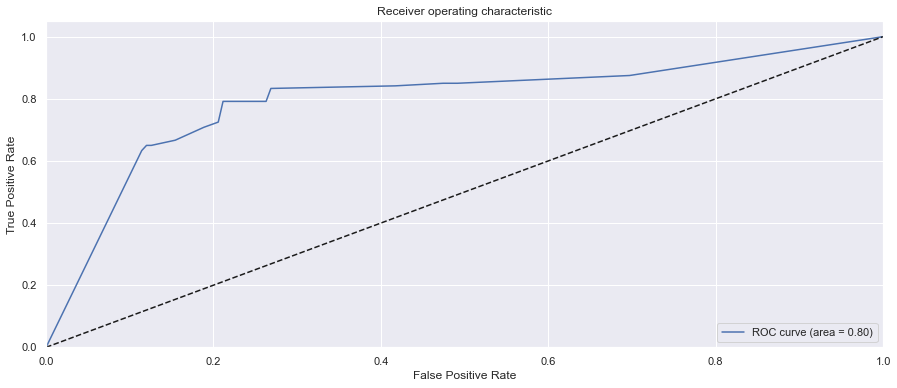

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,# color='darkorange',
         #lw=lw, 
         label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] #, color='navy'
         #, lw=lw
         #, linestyle='--'
        , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [61]:
'''#Параметры уравнения регрессии

print(clf.score(X_test,y_test))
print(clf.coef_)
print(clf.intercept_)
print(cross_val_score(clf,X_train,y_train,cv=4).mean())'''

'#Параметры уравнения регрессии\n\nprint(clf.score(X_test,y_test))\nprint(clf.coef_)\nprint(clf.intercept_)\nprint(cross_val_score(clf,X_train,y_train,cv=4).mean())'

In [62]:
# https://stepik.org/lesson/209694/step/4?unit=183198

In [63]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [77]:
#Набор фичей по их важности классификации. Их можно вытащить барчартом. См ниже - в лесу вытащила через датафрейм.

In [64]:
clf.feature_importances_

array([0.2351302 , 0.08432554, 0.03112775, 0.        , 0.10166805,
       0.        , 0.54774847, 0.        , 0.        , 0.        ])

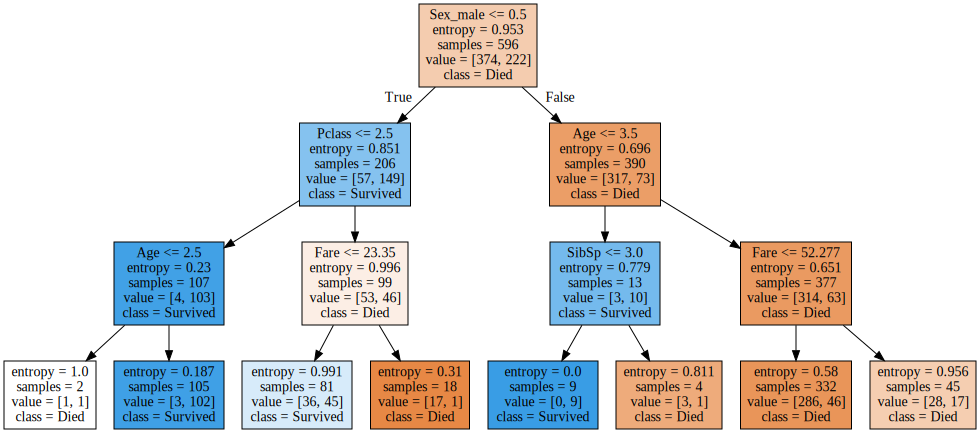

In [65]:
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

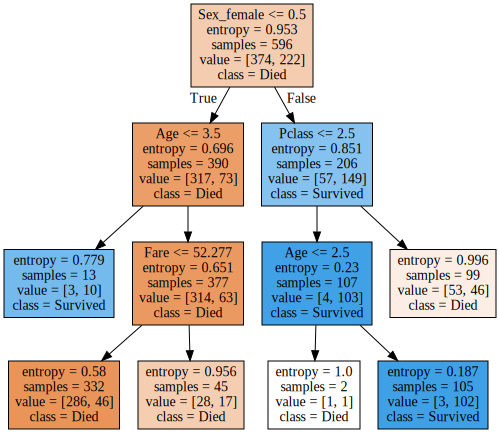

In [66]:
# Просто добавим min_samples_split=100
# Перестаёт разделять те группы, где меньше 100 единиц наблюдения
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)
clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

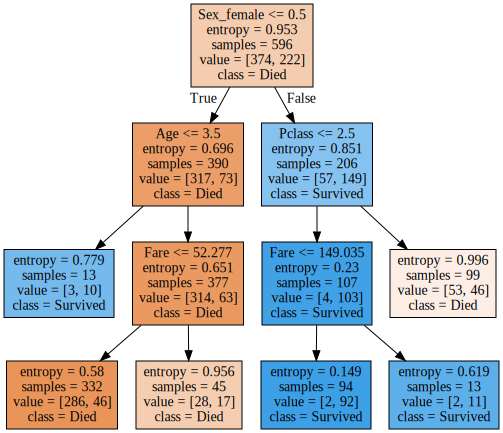

In [67]:
# Просто добавим min_samples_leaf=10
# Теперь нет листов, где получается меньше 10 единиц наблюдения
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf
                                    , out_file=None
                                    , feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))

display(SVG(graph.pipe(format='svg')))

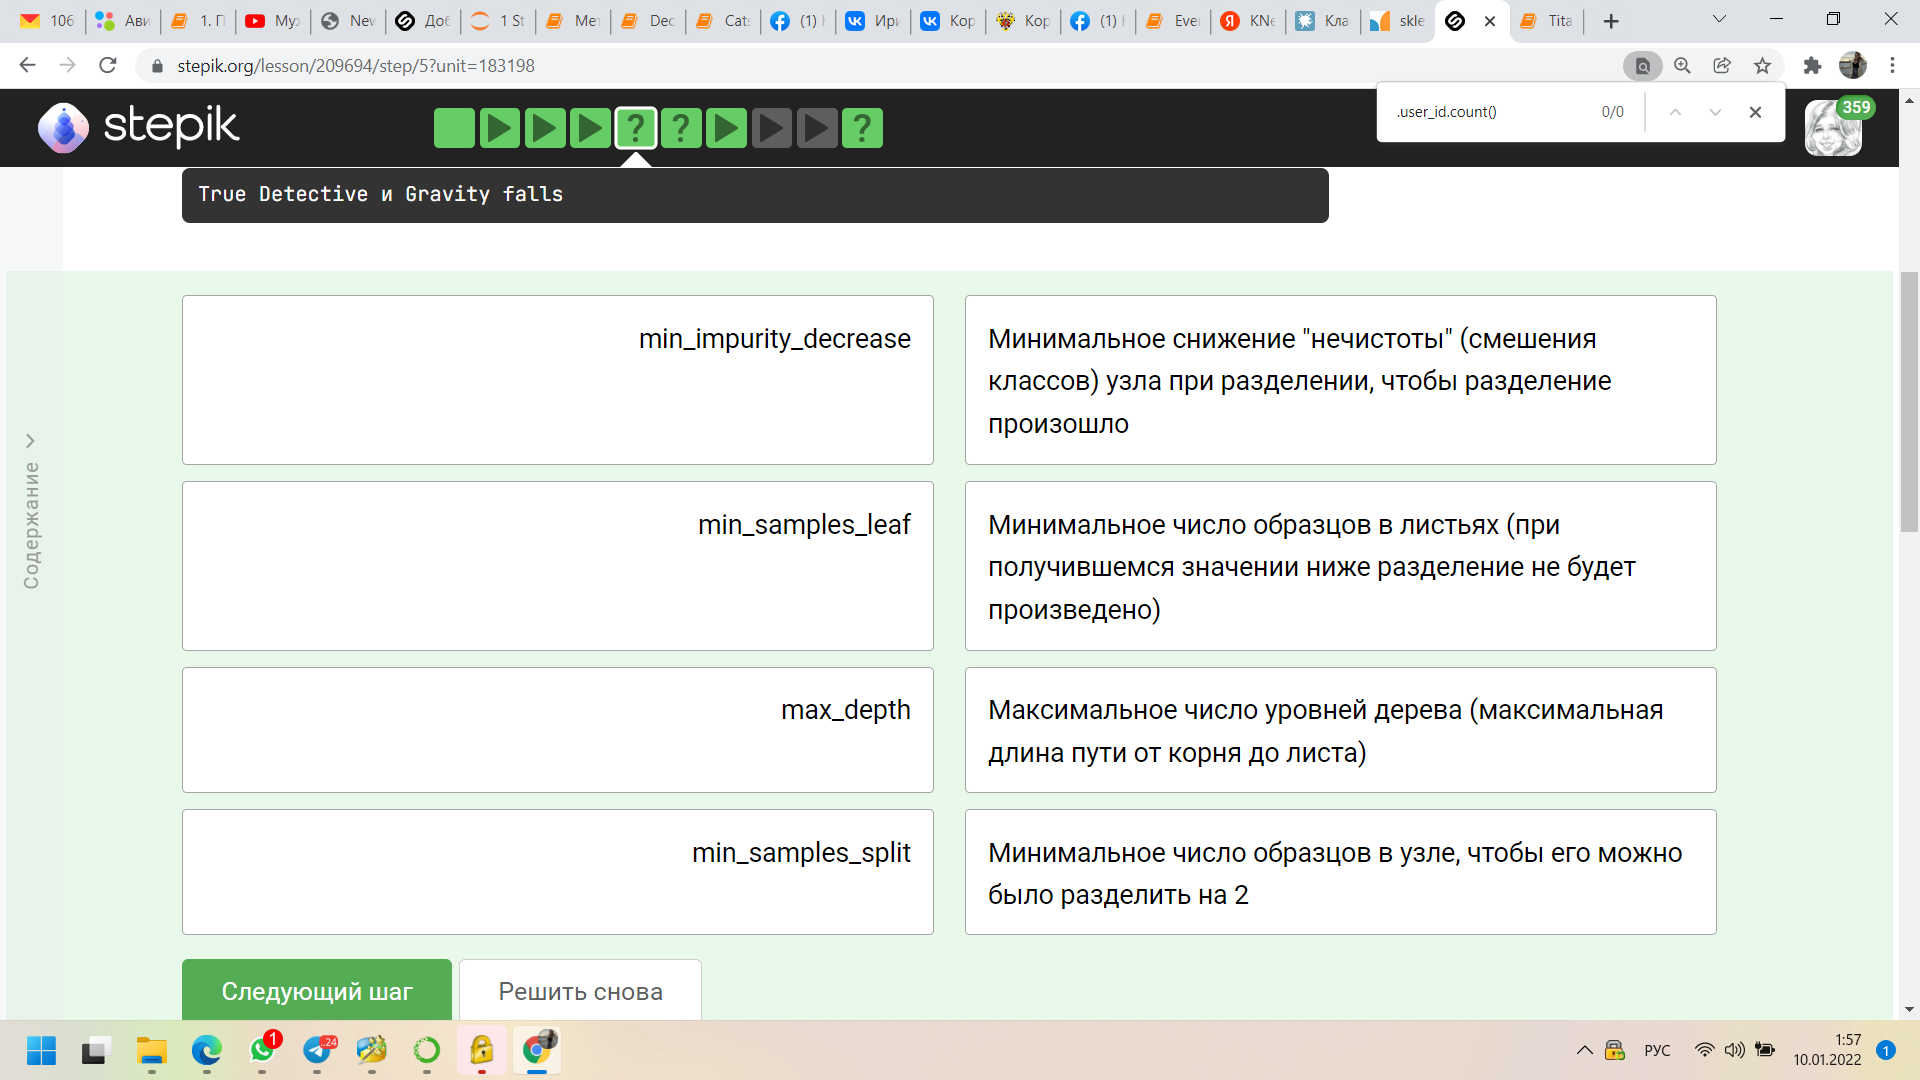

### Random Forrest (Случайный лес)
https://stepik.org/lesson/209695/step/7?unit=183199

Промежуточное задание на случайный лес

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

rf=RandomForestClassifier(n_estimators = 15 , max_depth = 5)

rf.fit(x_train, y_train)

predictions=rf.predict(x_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [69]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf_rf=RandomForestClassifier()
parametrs={'n_estimators':[10, 20, 30], 'max_depth':[2, 5, 7, 10]}
grid_search_cv_clf= GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train )
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [70]:
# Продолжить с https://stepik.org/lesson/209695/step/10?unit=183199 

In [71]:
best_clf=grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.8067796610169492

In [72]:
feature_importances=best_clf.feature_importances_

In [73]:
feature_importances_df=pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

In [80]:
print(len(list(X_train)),    feature_importances.shape)

10 (10,)


In [74]:
# Вот тут набор фичей, по которым мы делали сплиты в целях максимального снижения энтропии в данных

In [75]:
feature_importances_df.sort_values('feature_importances', ascending=False )

,features,feature_importances
6,Sex_male,0.322653
4,Fare,0.191705
1,Age,0.136182
5,Sex_female,0.117637
0,Pclass,0.103829
3,Parch,0.044769
2,SibSp,0.040505
9,Embarked_S,0.018283
7,Embarked_C,0.017671
8,Embarked_Q,0.006764


<AxesSubplot:>

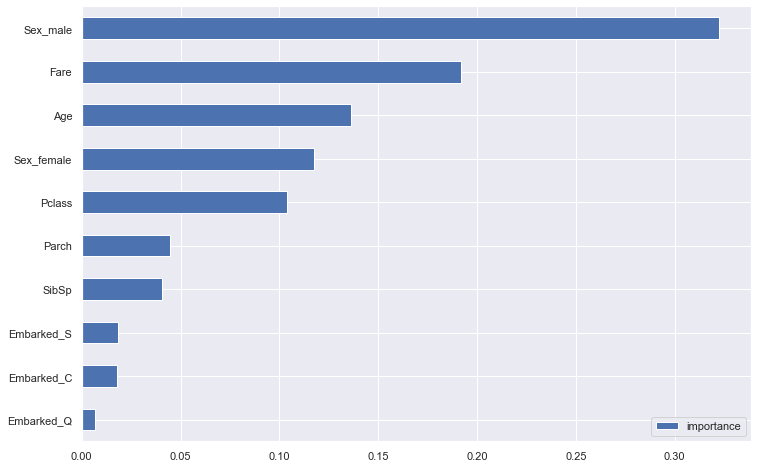

In [79]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


ПОЧИТАТЬ ПРО BOOSTSTRAP вот тут https://stepik.org/lesson/209695/step/4?unit=183199